<a href="https://colab.research.google.com/github/RonildoSilva/Avaliacao-Teorica--Floyd-x-Dijkstra/blob/master/Submiss%C3%A3o_2_%5BFloyd_x_Dijkstra%5D_(Avalia%C3%A7%C3%A3o_Te%C3%B3rica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto e Análise de Algoritmos
## Avaliação Teórica de Algoritmos


Plot Matrix

In [153]:
import matplotlib.pyplot as plt
import numpy as np

def plot_matrix(graph):
  data = graph
  dim = len(data)
  fig, ax = plt.subplots(figsize=(dim, dim))

  ax.matshow(data, cmap='binary_r',  interpolation='nearest')

  for (i, j), z in np.ndenumerate(data):
      ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
              bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

  plt.show()

### Floyd Warshall Algorithm

In [166]:
def floyd_warshall(graph):
  dist = graph
  # Number of vertices in the graph 
  V = len(graph)

  for k in range(V): 
    # pick all vertices as source one by one 
    for i in range(V): 
      # Pick all vertices as destination for the 
      # above picked source 
      for j in range(V): 
        dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

  return dist


### Dijkstra Algorithm

In [155]:
def min_distance(dist, sptSet, V):
  min = float('inf')
  min_index = 0 
  
  for v in range(V):
    if (dist[v] < min and sptSet[v] == False):
      min = dist[v]
      min_index = v 

  return min_index 

In [156]:
def dijkstra(src, graph): 
    V = len(graph)
    dist = [float('inf')] * V
    dist[src] = 0
    sptSet = [False] * V
    
    for cout in range(V):
      u = min_distance(dist, sptSet, V)
      sptSet[u] = True
      for v in range(V):
        if graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + graph[u][v]:
          dist[v] = dist[u] + graph[u][v]

    return dist


In [157]:
def n_djikstra(graph):
  dist_graph = list()
  for i in range(len(graph)):
    dist_graph.append(dijkstra(i, graph))

  return dist_graph

### Exemplo de execução

In [167]:
INF = float('inf')

graph = [
      [0,   5,    INF,  10], 
			[INF, 0,    3,    INF], 
			[INF, INF,  0,    1], 
			[INF, INF,  INF,  0] 
		] 

# gera um grafo de n vertices
#graph = np.random.randint(100, size=(5,5))
# atribui a diagonal, valores iguais a 0
#np.fill_diagonal(graph, 0)

floyd_warshall_graph = floyd_warshall(graph)
n_djikstra_graph = n_djikstra(graph)

In [163]:
floyd_warshall_graph == n_djikstra_graph

True

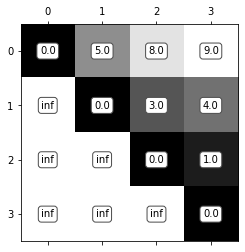

In [164]:
plot_matrix(floyd_warshall_graph)

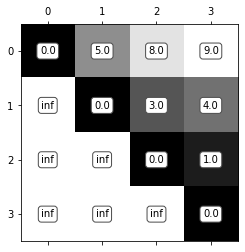

In [165]:
plot_matrix(n_djikstra_graph)

## Análise

### Execução

In [203]:
import numpy as np

N = 5

np.random.seed(9)

graph = np.random.randint(100, size=(2,2))

print(graph)

[[92 54]
 [56 22]]


In [177]:
import random
import time

size_time_data = list()
cols = ['size', 'time']

for i in range(N):
    start = time.time()
    time.sleep(5 * i)
    end = time.time()

    delta_time = end - start

    size_time_data.append([i, delta_time])

### Captura dos dados de execução

In [174]:
import pandas as pd

In [178]:
df_dijkstra = pd.DataFrame(size_time_data, columns=cols)

In [179]:
df_dijkstra

,size,time
0,0,0.000018
1,1,5.005151
2,2,10.001547
3,3,15.015137
4,4,20.020095


### Exibição dos dados

Text(0, 0.5, 'Tempo')

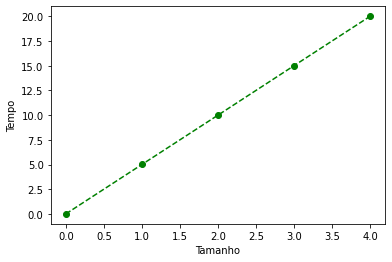

In [194]:
import matplotlib.pyplot as plt

plt.plot(df_dijkstra['size'], df_dijkstra['time'], 
         color='green', marker='o', linestyle='dashed')

#plt.scatter(df_dijkstra['size'], df_dijkstra['time'])

plt.xlabel('Tamanho')
plt.ylabel('Tempo')